## Import Libraries

In [37]:
import os
import wave 
import playsound
import soundfile as sf
import pyaudio
#pip install soundfile
from IPython.display import Audio, display
import pyaudio #python bindings for PortAudio the cross_platform audio i/o  library
import sounddevice as sd #simpler but less controll then pyaudio
from pydub import AudioSegment
#pip  install ffmpeg
import matplotlib.pyplot as plt
import librosa.display
import sklearn

import torch
import torchaudio
import torchaudio.transforms as T
import torchaudio.functional as F
c=0


In [16]:

'''/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
brew install ffmpeg
ffmpeg -version
'''

'/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"\nbrew install ffmpeg\nffmpeg -version\n'

### Display and play audio IPython.display()

In [17]:
audio_dir= "audio_processing"

In [18]:
#1 IPython.display(): Display and play audio
#from IPython.display import Audio, display

c=0
path= os.path.join(audio_dir,f"audio_{c}.wav")
playsound.playsound(path)  # 1 play audio directly
display(Audio(path)) # 2 Display and play audio

### Read Write in audio files SoundFile

In [19]:
#2 SoundFile: Read Write in audio files WAV, FLAC, OGG, MAT
#import soundfile as sf
#import os

c = 0  # Initializing a counter variable to 0

audio_dir = "audio_processing"# Define the directory where the audio files are located
path = os.path.join(audio_dir, f"audio_{c}.wav")# Create the full path to the audio file using the counter variable


# Read the audio file
data, samplerate = sf.read(path) 

# Print the shape of the audio data and the sample rate
print(f"Reading audio file: audio_{c}, from:[",path,"]\nShape of it:",data.shape,"\nSamplerate (frame_rate):", samplerate,"Hertz")

# Create a new path for saving a modified or new audio file
new_path = os.path.join(audio_dir, f"audio_{c+1}.wav")

# Write the audio data to the new path
#sf.write(new_path, data, samplerate)
print("Creating new audio file:[",new_path,"] as a copy of [",path,"]")

# Print the audio data
print("The data of new_audio:",data)


Reading audio file: audio_0, from:[ audio_processing/audio_0.wav ]
Shape of it: (167958,) 
Samplerate (frame_rate): 48000 Hertz
Creating new audio file:[ audio_processing/audio_1.wav ] as a copy of [ audio_processing/audio_0.wav ]
The data of new_audio: [0.57281494 0.54901123 0.25109863 ... 0.01107788 0.01138306 0.01190186]


In [20]:
# WAVE
# Importing the wave library to work with WAVE files
#import wave

c=1
audio_dir = "audio_processing"# Define the directory where the audio files are located
path = os.path.join(audio_dir, f"audio_{c}.wav")# Create the full path to the audio file using the counter variable

# Open wave file in read mode
print("Old Audio")
obj = wave.open(path, 'r')  # 'r' indicates read mode
print("Number of channels:", obj.getnchannels())# Print the number of channels (1 for mono, 2 for stereo)
print("Sample width:", obj.getsampwidth())# Print the sample width in bytes (usually 1, 2, or 4 bytes per sample)
print("Frame rate:", obj.getframerate())# Print the frame rate (samples per second, also known as the sample rate)
print("Number of frames:", obj.getnframes())# Print the number of audio frames in the file
print("Parameters:", obj.getparams())# Print all parameters as a tuple (nchannels, sampwidth, framerate, nframes, comptype, compname)
frames = obj.readframes(obj.getnframes())# Read all frames (audio data) from the wave file
data, samplerate = sf.read(path)# Read the audio file using soundfile
original_duration = len(data) / samplerate# Calculate and print the duration of the original audio file
print("Duration:", original_duration, "seconds")
original_file_size = os.path.getsize(path)
print("File size:", original_file_size, "bytes")
obj.close()# Close the wave file


# write new wave file 
new_path = os.path.join(audio_dir, f"audio_{c+1}.wav")# Create the full path to the audio file using the counter variable
'''sample_rate = 16000.0  # Set a new sample rate for the output file (in Hertz), 16000<(more samples per second => best quality, larger file size)<48000   
obj = wave.open(new_path, 'w')  # Open a new wave file in write mode, 'w' indicates write mode
obj.setnchannels(1)# Set the number of channels to 1 (mono)
obj.setsampwidth(2)# Set the sample width to 2 bytes (16-bit samples)
obj.setframerate(sample_rate)# Set the frame rate to the new sample rate
obj.writeframes(frames)# Write the frames (audio data) to the new wave file
obj.close()# Close the new wave file'''

# read wave file to print defrencies
obj = wave.open(new_path, 'r')  # Open a new wave file in read mode
print("\n\nNew Audio")
print("Number of channels:", obj.getnchannels())# Print the number of channels (1 for mono, 2 for stereo)
print("Sample width:", obj.getsampwidth())# Print the sample width in bytes (usually 1, 2, or 4 bytes per sample)
print("Frame rate:", obj.getframerate())# Print the frame rate (samples per second, also known as the sample rate)
print("Number of frames:", obj.getnframes())# Print the number of audio frames in the file
print("Parameters:", obj.getparams())# Print all parameters as a tuple (nchannels, sampwidth, framerate, nframes, comptype, compname)
new_data, new_samplerate = sf.read(new_path)# Read the audio file using soundfile
duration = len(new_data) / new_samplerate# Calculate and print the duration of the original audio file
print("Duration:", duration, "seconds")
file_size = os.path.getsize(new_path)
print("File size:", file_size, "bytes")
obj.close()# Close the new wave file'''




#the highest frequency that can be accurately represented is half of the sample rate. For a sample rate of 16000 Hz, the maximum frequency that can be represented is 8000 Hz.

Old Audio
Number of channels: 1
Sample width: 2
Frame rate: 48000
Number of frames: 167958
Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=167958, comptype='NONE', compname='not compressed')
Duration: 3.499125 seconds
File size: 335960 bytes


New Audio
Number of channels: 1
Sample width: 2
Frame rate: 16000
Number of frames: 167958
Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=167958, comptype='NONE', compname='not compressed')
Duration: 10.497375 seconds
File size: 335960 bytes


### PyAudio :I/O Library To Record From Microphone

In [27]:
#import pyaudio #python bindings for PortAudio the cross_platform audio i/o  library
#import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
audio_dir = "audio_processing"


try:
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate= RATE,
                    input= True,
                    frames_per_buffer=CHUNK)
    print("Start Recording...")
    frames = []
    seconds = 3
    for i in range(0, int(RATE / CHUNK * seconds)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("Recording Stopped...")
    stream.stop_stream()
    stream.close()
    p.terminate()

    if not os.path.exists(audio_dir):
        os.makedirs(audio_dir)

    c = 6
    path = os.path.join(audio_dir, f"audio_{c}.wav")
    wf = wave.open(path, "wb")
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    print(path, ' recorded')
    wf.close()
    
except OSError as e:
    print(f"An error occurred: {e}")

||PaMacCore (AUHAL)|| Warning on line 521: err=''!obj'', msg=Unknown Error
||PaMacCore (AUHAL)|| Warning on line 441: err=''!obj'', msg=Unknown Error
An error occurred: [Errno -9986] Internal PortAudio error
||PaMacCore (AUHAL)|| Error on line 1322: err='-10851', msg=Audio Unit: Invalid Property Value


In [44]:


CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 48000
audio_dir = "audio_processing"

def list_audio_devices():
    p = pyaudio.PyAudio()
    device_count = p.get_device_count()
    devices = []
    for i in range(device_count):
        devices.append(p.get_device_info_by_index(i))
    p.terminate()
    return devices

def print_audio_devices():
    devices = list_audio_devices()
    for i, device in enumerate(devices):
        print(f"Device {i}: {device['name']}")
    return int(input("select your device mic"))

# Uncomment the following line to list audio devices and find the index of your desired input device
#print_audio_devices()

#input_device_index = #3 #None  # Set this to the index of your desired input device if necessary

try:
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    input_device_index=print_audio_devices(),  # Specify input device index
                    frames_per_buffer=CHUNK)
    print("Start Recording...")
    frames = []
    seconds = 3
    for i in range(0, int(RATE / CHUNK * seconds)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("Recording Stopped...")
    stream.stop_stream()
    stream.close()
    p.terminate()

    if not os.path.exists(audio_dir):
        os.makedirs(audio_dir)

    c = 6
    path = os.path.join(audio_dir, f"audio_{c}.wav")
    wf = wave.open(path, "wb")
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    print(path, ' recorded')
    wf.close()

except OSError as e:
    print(f"An error occurred: {e}")#'''


Device 0: Built-in Microphone
Device 1: Built-in Output
Device 2: USB Audio Device
Device 3: USB Audio Device
Device 4: Soundflower (2ch)
Device 5: Soundflower (64ch)
Device 6: Screenflick Loopback
Device 7: iShowU Audio Capture
Device 8: Périphérique agrégé
Device 9: Périphérique à sortie multiple
||PaMacCore (AUHAL)|| Warning on line 521: err=''!obj'', msg=Unknown Error
||PaMacCore (AUHAL)|| Warning on line 441: err=''!obj'', msg=Unknown Error
An error occurred: [Errno -9986] Internal PortAudio error
||PaMacCore (AUHAL)|| Error on line 1322: err='-10851', msg=Audio Unit: Invalid Property Value


### SoundDevice : Record Microphone , play audio

In [113]:
#import sounddevice as sd #simpler but less controll then pyaudio

fs= 44100 #format rate
duration= 5.0

myrecording = sd.rec(int(duration*fs), samplerate=fs, channels=1)
sd.wait()
sd.play(myrecording, fs)

### PyDub manipulate audio .mp3 and other formats 

In [1]:
#from pydub import AudioSegment

audio = AudioSegment.from_wav(path)
#boost volume by 6dB
audio= audio + 6

#repeat the clip twice
audio = audio * 2

# 2 sec fade in 
audio=audio.fade_in(2000)

audio.export("/Users/saraabdelhafid/Desktop/My Kids Robot/Source Code/Speechy_Robot/IA/archive/mashup.mp3",format="mp3")
display(Audio("/Users/saraabdelhafid/Desktop/My Kids Robot/Source Code/Speechy_Robot/IA/archive/mashup.mp3"))

NameError: name 'path' is not defined

### librosa : library for audio analysis

In [114]:
data, sr = librosa.load(path, sr=16000) #sample rate
print(data.shape, sr)

(53387,) 16000


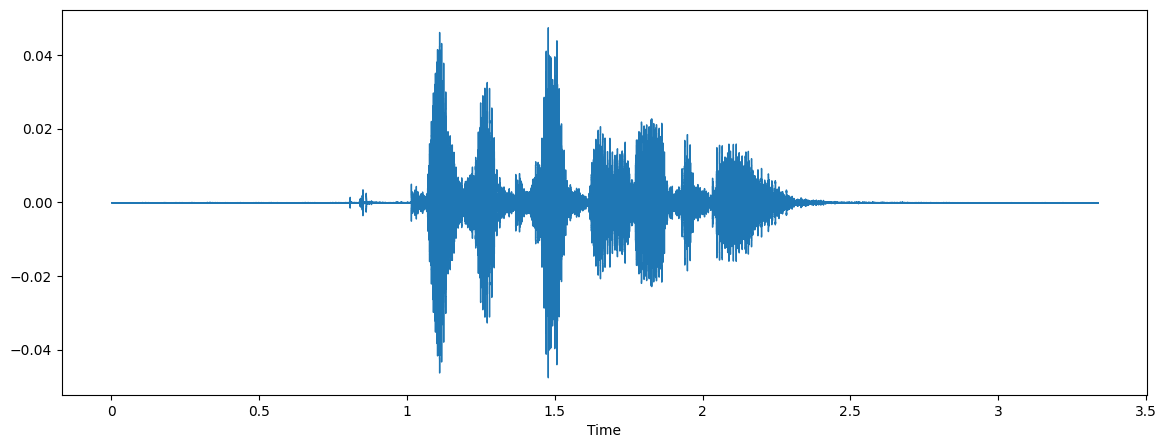

In [115]:
#import matplotlib.pyplot as plt
#import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sr)

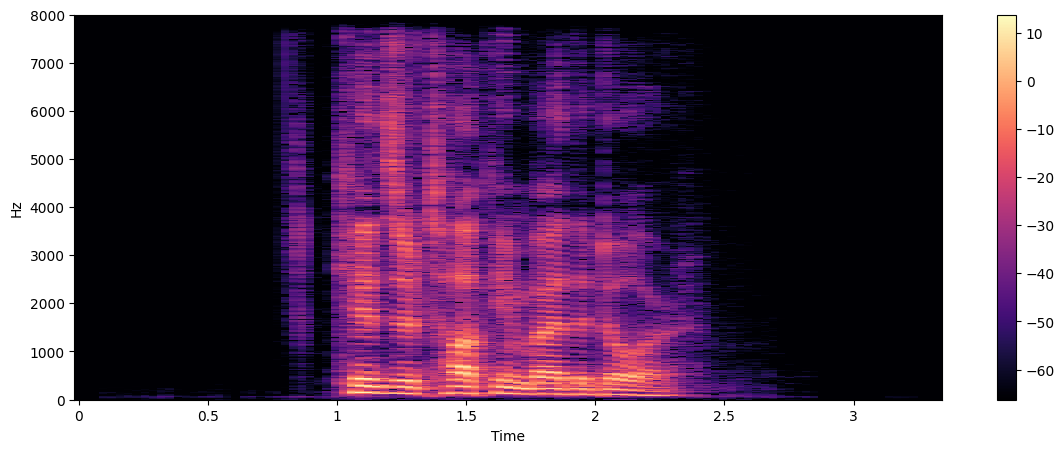

In [116]:
# spectrogram

X = librosa.stft(data) #short-time Fourier transform (STFT)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

(105,)


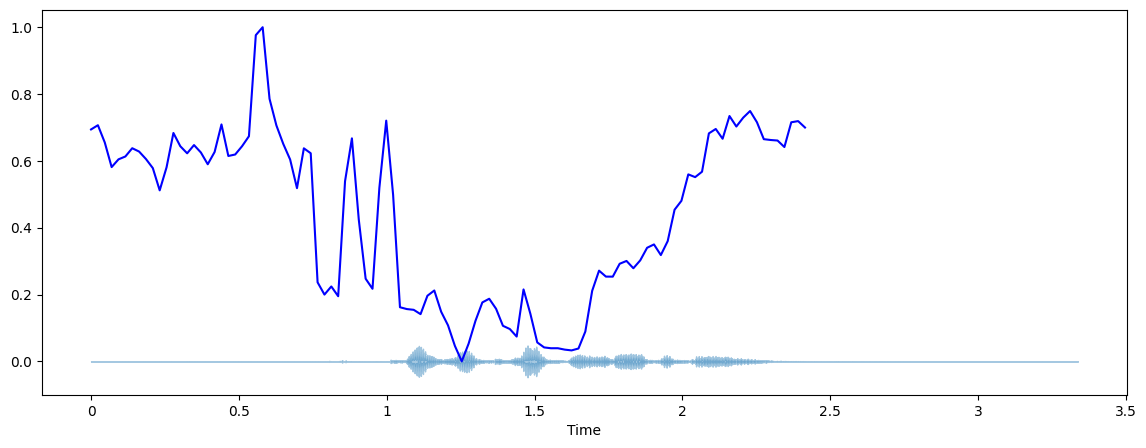

In [74]:
#Features Analysis, Spectral Centroid
#import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y=data, sr=sr)[0]
print(spectral_centroids.shape)

#computing the time variable for visualization
plt.figure(figsize=(14,5))
frames = range(len(spectral_centroids))
t= librosa.frames_to_time(frames)

#normalizing the spectral centroids for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=0)
#plotting the spectral centroids along the waveform
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

In [119]:
#audio file types :
# .mp3:
# .flac:
# .wav: all data
#import wave 

#audio signal parameters
#- number of channels: mono=1 sterio= 2
#- sample width: number of bytes for each sample
#- framerate/ sample_rate: frequancy means the number of samples for each second 
#- number of frames
#- values of a frame



obj = wave.open("audio_wave_rec/output_rec0.wav","rb") # read binery
print("number of channels", obj.getnchannels())
print("sample width", obj.getsampwidth())
print("frame rate", obj.getframerate())
print("number of frames", obj.getnframes())
print("parameters", obj.getparams())
#frames = obj.readframes(obj.getnframes())


audio_time = obj.getnframes() / obj.getframerate()
print("audio time", audio_time)

frames = obj.readframes(-1)
#print(frames.shape)


print(type(frames), type(frames[0]))
print(len(frames))# the 2*of print("number of frames", obj.getnframes()) cs -----> print("sample width", obj.getsampwidth()) 
obj.close()

obj_new = wave.open("audio_wave_rec/output_rec3.wav","wb")
obj_new.setnchannels(1)
obj_new.setsampwidth(2)
obj_new.setframerate(16000)

obj_new.writeframes(frames)
obj_new.close()






number of channels 1
sample width 2
frame rate 48000
number of frames 64534
parameters _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=64534, comptype='NONE', compname='not compressed')
audio time 1.3444583333333333
<class 'bytes'> <class 'int'>
129068


### TorchAudio: audio and signals processing with PyTorch

In [79]:
#import torch
#import torchaudio

waveform, sample_rate= torchaudio.load(path)
print(waveform.shape, sample_rate)

torch.Size([1, 160160]) 48000


In [80]:
#Resampling 
#import torchaudio.transforms as T
#import torchaudio.functional as F

waveform, sample_rate= torchaudio.load(path)

resample_rate= 32000
resmapled_waveform1= F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=12)
resmapled_waveform2= F.resample(waveform, sample_rate, resample_rate, resampling_method="kaiser_window")


/var/folders/dp/l_dvcrdd6vs676_54700jxw00000gn/T/ipykernel_10020/186935599.py:9: UserWarning: "kaiser_window" resampling method name is being deprecated and replaced by "sinc_interp_kaiser" in the next release. The default behavior remains unchanged.
  resmapled_waveform2= F.resample(waveform, sample_rate, resample_rate, resampling_method="kaiser_window")


In [81]:
#apply effects to file
def _plot(waveform, sample_rate, title):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis= torch.arange(0/num_frames)/ sample_rate
    figure, axes= plt.subplots(num_channels, 1)
    if num_channels==1:
        axes= [axes]
    for c in range(num_channels):
        if title=="Waveform":
            axes[c].plot(time_axis, waveform[c], linewidth=1)
            axes[c].grid(True)
        else:
            axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylable(f'Channel {c+1}')
    figure.suptitle(title)
    plt.show(block=False)
#.... To Be Centenued 

In [104]:
'''import torch
import torchaudio
from torchaudio.models import DeepSpeech
from torchaudio.datasets import LIBRISPEECH

# Define the Arabic alphabet manually
ARABIC_ALPHABET = "ابتثجحخدذرزسشصضطظعغفقكلمنهوي"

# Check if CUDA is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained DeepSpeech model
model = DeepSpeech(num_classes=len(ARABIC_ALPHABET)).to(device)

# Load a sample audio file (replace "path/to/your/audio.wav" with the actual path)
audio_file = "path/to/your/audio.wav"
waveform, sample_rate = torchaudio.load(audio_file)

# Preprocess the audio waveform
# DeepSpeech expects the input to have shape (batch_size, num_channels, num_samples)
waveform = waveform.unsqueeze(0).to(device)

# Perform inference
output = model(waveform)

# Decode the output to text
# Output is a sequence of character probabilities over time
# For simplicity, let's just take the argmax along the time axis
decoded_output = torch.argmax(output, dim=-1)

# Convert the indices to characters
# Assuming the indices directly correspond to Arabic alphabet
transcription = ''.join(ARABIC_ALPHABET[i] for i in decoded_output[0])

print("Transcription:", transcription)

'''


'import torch\nimport torchaudio\nfrom torchaudio.models import DeepSpeech\nfrom torchaudio.datasets import LIBRISPEECH\n\n# Define the Arabic alphabet manually\nARABIC_ALPHABET = "ابتثجحخدذرزسشصضطظعغفقكلمنهوي"\n\n# Check if CUDA is available and set device accordingly\ndevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")\n\n# Load pre-trained DeepSpeech model\nmodel = DeepSpeech(num_classes=len(ARABIC_ALPHABET)).to(device)\n\n# Load a sample audio file (replace "path/to/your/audio.wav" with the actual path)\naudio_file = "path/to/your/audio.wav"\nwaveform, sample_rate = torchaudio.load(audio_file)\n\n# Preprocess the audio waveform\n# DeepSpeech expects the input to have shape (batch_size, num_channels, num_samples)\nwaveform = waveform.unsqueeze(0).to(device)\n\n# Perform inference\noutput = model(waveform)\n\n# Decode the output to text\n# Output is a sequence of character probabilities over time\n# For simplicity, let\'s just take the argmax along the time axis\nde